Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [27]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [28]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [29]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/Cancer Detection using CNN/Train")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/Cancer Detection using CNN/Test")

In [30]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2251
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [31]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [32]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2251 files belonging to 9 classes.
Using 1801 files for training.


In [33]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2251 files belonging to 9 classes.
Using 450 files for validation.


In [34]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

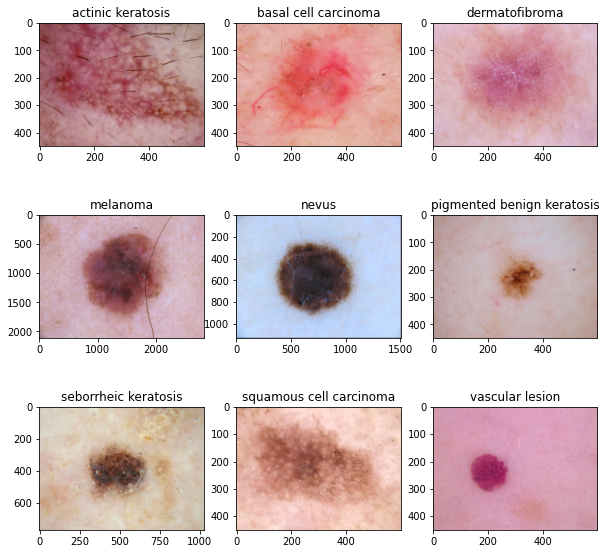

In [35]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [36]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [37]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [38]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Train the model

In [40]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 18s 126ms/step - loss: 2.1015 - accuracy: 0.1871 - val_loss: 2.0829 - val_accuracy: 0.1844
Epoch 2/20
57/57 [==============================] - 4s 77ms/step - loss: 2.0415 - accuracy: 0.1877 - val_loss: 2.0286 - val_accuracy: 0.1933
Epoch 3/20
57/57 [==============================] - 4s 76ms/step - loss: 2.0357 - accuracy: 0.2027 - val_loss: 2.0298 - val_accuracy: 0.1933
Epoch 4/20
57/57 [==============================] - 4s 77ms/step - loss: 2.0186 - accuracy: 0.2143 - val_loss: 1.9294 - val_accuracy: 0.2778
Epoch 5/20
57/57 [==============================] - 4s 77ms/step - loss: 2.0418 - accuracy: 0.2071 - val_loss: 2.0216 - val_accuracy: 0.2222
Epoch 6/20
57/57 [==============================] - 5s 81ms/step - loss: 2.0302 - accuracy: 0.2049 - val_loss: 2.0295 - val_accuracy: 0.1911
Epoch 7/20
57/57 [==============================] - 4s 77ms/step - loss: 2.0268 - accuracy: 0.2154 - val_loss: 2.0137 - val_accuracy: 0.1800
Epoch 8/20
57/57 [====

### Visualizing training results

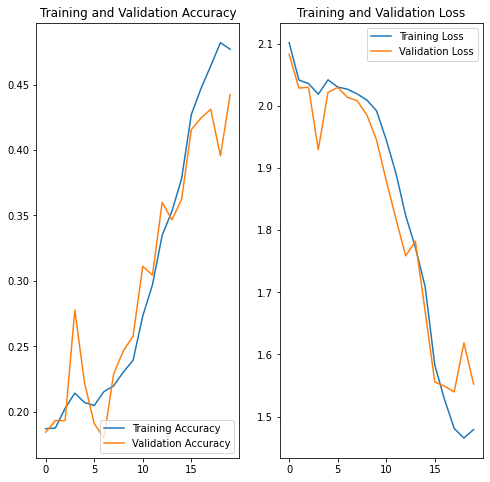

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Finding on the first base model



*   The model is overfitting because we can also see difference in loss functions in training & test around the 10th and 11th epoch
*   The accuracy is just around 80% because there are enough features to remember the pattern
*   Still we cannot decide if the model is overfitting or underfitting


In [42]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

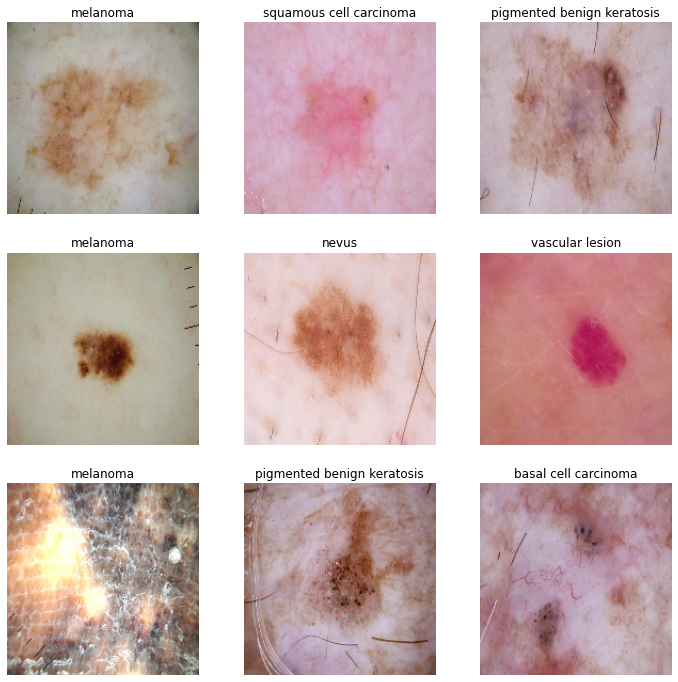

In [43]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [44]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compiling the model

In [45]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [46]:
## Your code goes here, note: train your model for 20 epochs
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 6s 93ms/step - loss: 2.0807 - accuracy: 0.1949 - val_loss: 2.0340 - val_accuracy: 0.1933
Epoch 2/30
57/57 [==============================] - 5s 87ms/step - loss: 1.9624 - accuracy: 0.2737 - val_loss: 1.9497 - val_accuracy: 0.2244
Epoch 3/30
57/57 [==============================] - 5s 86ms/step - loss: 1.7140 - accuracy: 0.3898 - val_loss: 1.5779 - val_accuracy: 0.4422
Epoch 4/30
57/57 [==============================] - 5s 86ms/step - loss: 1.6141 - accuracy: 0.4364 - val_loss: 1.6846 - val_accuracy: 0.4267
Epoch 5/30
57/57 [==============================] - 5s 86ms/step - loss: 1.5993 - accuracy: 0.4464 - val_loss: 1.5459 - val_accuracy: 0.4622
Epoch 6/30
57/57 [==============================] - 5s 87ms/step - loss: 1.6151 - accuracy: 0.4436 - val_loss: 1.5877 - val_accuracy: 0.4867
Epoch 7/30
57/57 [==============================] - 5s 86ms/step - loss: 1.5073 - accuracy: 0.4725 - val_loss: 1.5825 - val_accuracy: 0.4733
Epoch 8/30
57/57 [======

### Visualizing the results

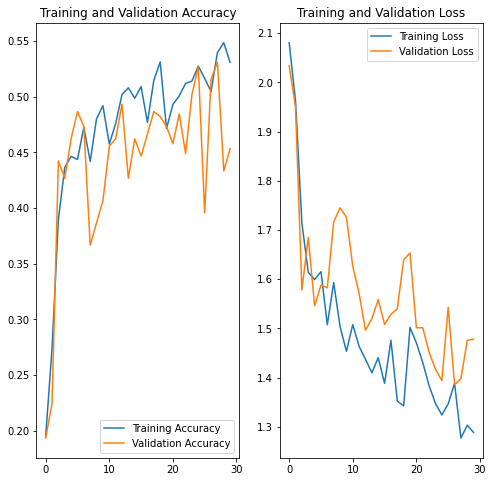

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Observations from the model which we trained and tested second time:**


1.   We can see that we have overcomed the problem of overfitting from the first chart as training and validation trend goes hand by hand

2.   But we can see that accuracy is still around 50% which is not that much ideal to have the model. So we will go further to analyse some more results.



#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [51]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
1,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
2,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
3,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
4,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
...,...,...
2246,/content/gdrive/My Drive/Cancer Detection usin...,vascular lesion
2247,/content/gdrive/My Drive/Cancer Detection usin...,vascular lesion
2248,/content/gdrive/My Drive/Cancer Detection usin...,vascular lesion
2249,/content/gdrive/My Drive/Cancer Detection usin...,vascular lesion


In [52]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
1,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
2,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
3,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
4,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
...,...,...
2246,/content/gdrive/My Drive/Cancer Detection usin...,vascular lesion
2247,/content/gdrive/My Drive/Cancer Detection usin...,vascular lesion
2248,/content/gdrive/My Drive/Cancer Detection usin...,vascular lesion
2249,/content/gdrive/My Drive/Cancer Detection usin...,vascular lesion


<BarContainer object of 9 artists>

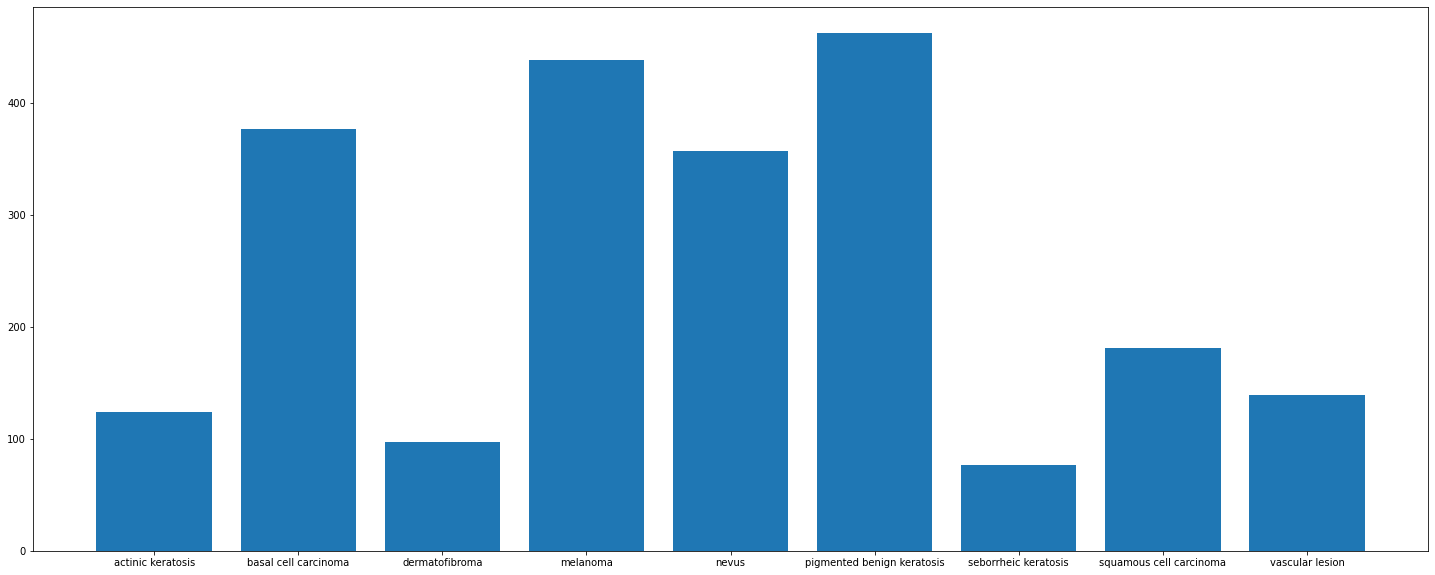

In [53]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?



For the above questions, we have below findings:
*   seborrheic keratosis has least number of sample
*   nevus and basal cell carcinoma have the proportinate number of samples. Also melanoma and pigmented bengin keratosis as the proportinate number of samples. 


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [54]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [58]:
path_to_training_dataset="/content/gdrive/My Drive/Cancer Detection using CNN/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset, save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2251 image(s) found.
Output directory set to /content/gdrive/My Drive/Cancer Detection using CNN/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4A9E2C3850>: 100%|██████████| 500/500 [00:47<00:00, 10.59 Samples/s]


Initialised with 2251 image(s) found.
Output directory set to /content/gdrive/My Drive/Cancer Detection using CNN/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4A883A6F90>: 100%|██████████| 500/500 [00:45<00:00, 10.89 Samples/s]


Initialised with 2251 image(s) found.
Output directory set to /content/gdrive/My Drive/Cancer Detection using CNN/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x7F4B10668610>: 100%|██████████| 500/500 [00:37<00:00, 13.40 Samples/s]


Initialised with 2251 image(s) found.
Output directory set to /content/gdrive/My Drive/Cancer Detection using CNN/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4B1B7DCA50>: 100%|██████████| 500/500 [00:37<00:00, 13.16 Samples/s]


Initialised with 2251 image(s) found.
Output directory set to /content/gdrive/My Drive/Cancer Detection using CNN/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4A9E168ED0>: 100%|██████████| 500/500 [00:40<00:00, 12.32 Samples/s]


Initialised with 2251 image(s) found.
Output directory set to /content/gdrive/My Drive/Cancer Detection using CNN/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4B1B62D790>: 100%|██████████| 500/500 [00:46<00:00, 10.85 Samples/s]


Initialised with 2251 image(s) found.
Output directory set to /content/gdrive/My Drive/Cancer Detection using CNN/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4A856E47D0>: 100%|██████████| 500/500 [00:41<00:00, 12.14 Samples/s]


Initialised with 2251 image(s) found.
Output directory set to /content/gdrive/My Drive/Cancer Detection using CNN/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4B1B706ED0>: 100%|██████████| 500/500 [00:46<00:00, 10.74 Samples/s]


Initialised with 2251 image(s) found.
Output directory set to /content/gdrive/My Drive/Cancer Detection using CNN/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4A9E09FA50>: 100%|██████████| 500/500 [00:40<00:00, 12.26 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [59]:
data_dir_train1 = pathlib.Path("/content/gdrive/My Drive/Cancer Detection using CNN/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [60]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
1,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
2,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
3,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
4,/content/gdrive/My Drive/Cancer Detection usin...,actinic keratosis
...,...,...
6746,/content/gdrive/My Drive/Cancer Detection usin...,vascular lesion
6747,/content/gdrive/My Drive/Cancer Detection usin...,vascular lesion
6748,/content/gdrive/My Drive/Cancer Detection usin...,vascular lesion
6749,/content/gdrive/My Drive/Cancer Detection usin...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [64]:
new_df['Label'].value_counts()

pigmented benign keratosis    1420
melanoma                      1277
basal cell carcinoma          1092
nevus                         1077
squamous cell carcinoma        560
vascular lesion                397
actinic keratosis              374
dermatofibroma                 296
seborrheic keratosis           258
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [66]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [68]:
data_dir_train1="/content/gdrive/My Drive/Cancer Detection using CNN/Train/output"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [69]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [70]:
## your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [71]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [72]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


113/113 [==============================] - 21s 177ms/step - loss: 1.9981 - accuracy: 0.2533 - val_loss: 1.8709 - val_accuracy: 0.3267
Epoch 2/50
113/113 [==============================] - 19s 163ms/step - loss: 1.7475 - accuracy: 0.3808 - val_loss: 1.6473 - val_accuracy: 0.4367
Epoch 3/50
113/113 [==============================] - 19s 163ms/step - loss: 1.5381 - accuracy: 0.4558 - val_loss: 1.4889 - val_accuracy: 0.4633
Epoch 4/50
113/113 [==============================] - 19s 163ms/step - loss: 1.4908 - accuracy: 0.4756 - val_loss: 1.3790 - val_accuracy: 0.5156
Epoch 5/50
113/113 [==============================] - 19s 163ms/step - loss: 1.3946 - accuracy: 0.5092 - val_loss: 1.3023 - val_accuracy: 0.5389
Epoch 6/50
113/113 [==============================] - 20s 166ms/step - loss: 1.2825 - accuracy: 0.5544 - val_loss: 1.1943 - val_accuracy: 0.5811
Epoch 7/50
113/113 [==============================] - 20s 165ms/step - loss: 1.1753 - accuracy: 0.5847 - val_loss: 1.2438 - val_accuracy: 0.5

#### **Todo:**  Visualize the model results

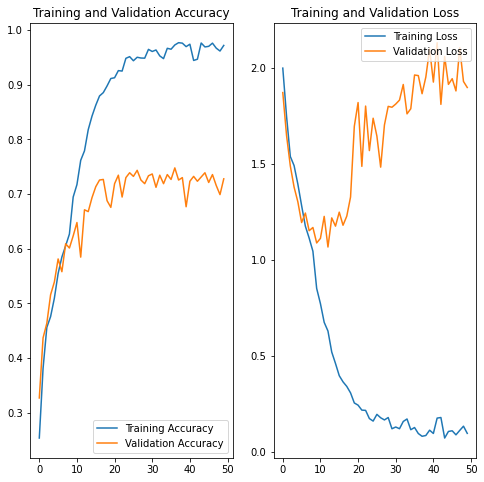

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



**We can see the following results from above charts:**



**1.   We can see the accuracy has been increased when we used the Augmentor library (from 50% to 70%) on the data that has been generated by the augmented library**
<br/>**2.   We can observe that model is still overfitted as there is gap in training and validation accuracy**
<br/>**3.   We can improve the model by hperparameter tuning**
<br/>**4.   We can solve the overfitting problem by adding more neurons, or adding layers or droput layers in the existing model**


